In [128]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib 

In [6]:
originaldf = pd.read_csv("homeprices.csv")
print( 'Shape of data frame : ', *originaldf.shape )
print( 'Columns in data frame : ', *originaldf.columns )
originaldf.head()

Shape of data frame :  13320 9
Columns in data frame :  area_type availability location size society total_sqft bath balcony price


,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


#### Droping features that are not required

In [22]:
df = originaldf.copy()
df = df.drop(['area_type','society','balcony','availability'],axis='columns')

In [23]:
print( 'Shape of data frame : ', *df.shape )
print( 'Columns in data frame : ', *df.columns )
df.head()

Shape of data frame :  13320 5
Columns in data frame :  location size total_sqft bath price


,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


#### Droping rows with null values

In [45]:
print('Null values in data frame before dropping : \n', df.isnull().sum())
print('\nShape before dropping : ', df.shape)
df2 = df.dropna()
print('Null values in data frame after dropping : \n', df2.isnull().sum())
print('\nShape before dropping : ', df2.shape)
print('So number of rows dropped is equal to : ', df.shape[0] - df2.shape[0] )

Null values in data frame before dropping : 
 location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

Shape before dropping :  (13320, 5)
Null values in data frame after dropping : 
 location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

Shape before dropping :  (13246, 5)
So number of rows dropped is equal to :  74


#### correcting data so that every column has data of same unit

#### #Add new feature(integer) for bhk (Bedrooms Hall Kitchen)

In [53]:
df3 = df2.copy()
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))
df3 = df3.drop(['size'], axis='columns')
print(df3['bhk'].unique())
df3.head()

[ 2  4  3  6  1  8  7  5 11  9 27 10 19 16 43 14 12 13 18]


,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2


#### #changing total_sqft feature in range form to integer

In [83]:
#finding values in total_sqft whoes values are in the form of range
df4 = df3.copy()
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True
print('No of columns having total_sqft values in the form of range is : ', \
      df4[~df4['total_sqft'].apply(is_float)].count()[0])

No of columns having total_sqft values in the form of range is :  190


In [84]:
def convert_sqft_to_num(total_sqft):
    values = total_sqft.split('-')
    if len(values) == 2:
        return (float(values[0])+float(values[1]))/2
    try:
        return float(total_sqft)
    except:
        return None
df4['total_sqft'] = df4['total_sqft'].apply(convert_sqft_to_num)
df4 = df4[df4['total_sqft'].notnull()]
df4.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2


In [85]:
print('No of columns having total_sqft values in the form of range after convertion : ', \
      df4[~df4['total_sqft'].apply(is_float)].count()[0])

No of columns having total_sqft values in the form of range after convertion :  0


#### #Add new feature called price per square feet

In [86]:
df5 = df4.copy()
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


#### Handling Categorical values

In [117]:
df6 = df5.copy()
df6['location'] = df6['location'].apply(lambda x: x.strip())
location_stats = df6['location'].value_counts(ascending=False)
print('Count of unique categorical values in datafarme : \n', location_stats.head() )
print('No of location name which used more than 10 : ', len(location_stats[location_stats>10]))
print('No of location name which used less than 10 : ', len(location_stats[location_stats<=10]))
print('No of location different name : ', len(location_stats))

Count of unique categorical values in datafarme : 
 Whitefield         533
Sarjapur  Road     392
Electronic City    304
Kanakpura Road     264
Thanisandra        235
Name: location, dtype: int64
No of location name which used more than 10 :  240
No of location name which used less than 10 :  1047
No of location different name :  1287


In [138]:
#Any location having less than 10 data points should be tagged as "other" location
location_stats_less_than_10 = location_stats[location_stats<=10]
df6['location'] = df6['location'].apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
df6.head(10)

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,1310.0,3.0,63.25,3,4828.244275
9,other,1020.0,6.0,370.00,6,36274.509804


### Outlier Removal Using Business Logic

In [153]:
'''
Let square ft per bedroom is 300 (i.e. 2 bhk apartment is minimum 600 sqft). 
If you have for example 400 sqft apartment with 2 bhk than that seems suspicious and can be removed as an outlier. 
We will remove such outliers by keeping our minimum thresold per bhk to be 300 sqft
'''
df7 = df6.copy()
print('Outliers are :\n', df7[~(df7['total_sqft']/df7['bhk'] < 300)].head(5))
print( '\nShape before removing outlier : ', df7.shape)
df7 = df7[~(df7['total_sqft']/df7['bhk'] < 300)]
print( 'Shape before removing outlier : ', df7.shape)

Outliers are :
                    location  total_sqft  bath   price  bhk  price_per_sqft
0  Electronic City Phase II      1056.0   2.0   39.07    2     3699.810606
1          Chikka Tirupathi      2600.0   5.0  120.00    4     4615.384615
2               Uttarahalli      1440.0   2.0   62.00    3     4305.555556
3        Lingadheeranahalli      1521.0   3.0   95.00    3     6245.890861
4                  Kothanur      1200.0   2.0   51.00    2     4250.000000

Shape before removing outlier :  (13200, 6)
Shape before removing outlier :  (12456, 6)


In [157]:
print( df7['price_per_sqft'].describe() )
'''
Here we find that min price per sqft is 267 rs/sqft whereas max is 176470 rs/sqft, 
this shows a wide variation in property prices. 
We should remove outliers per location using mean and one standard deviation
'''
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf['price_per_sqft'])
        st = np.std(subdf['price_per_sqft'])
        reduced_df = subdf[(subdf['price_per_sqft'] > (m-st)) & (subdf['price_per_sqft'] <= (m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
print( '\nShape before removing outlier : ', df7.shape)
df8 = remove_pps_outliers(df7)
print( '\nShape after removing outlier : ' , df8.shape)

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

Shape before removing outlier :  (12456, 6)

Shape after removing outlier :  (10242, 6)


#### Let's check if for a given location how does the 2 BHK, 3BHK and 4 BHK property prices look like

In [186]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    bhk4 = df[(df.location==location) & (df.bhk==4)]
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.scatter(bhk4.total_sqft,bhk4.price,marker='*', color='red',label='4 BHK', s=50)
#     for i in df['bhk'].unique():
#         if i > 7:
#             continue
#         bhk = df[(df.location==location) & (df.bhk==i)]
#         plt.scatter(bhk.total_sqft,bhk.price,label=f'{i} BHK', marker='+', s=50)
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()

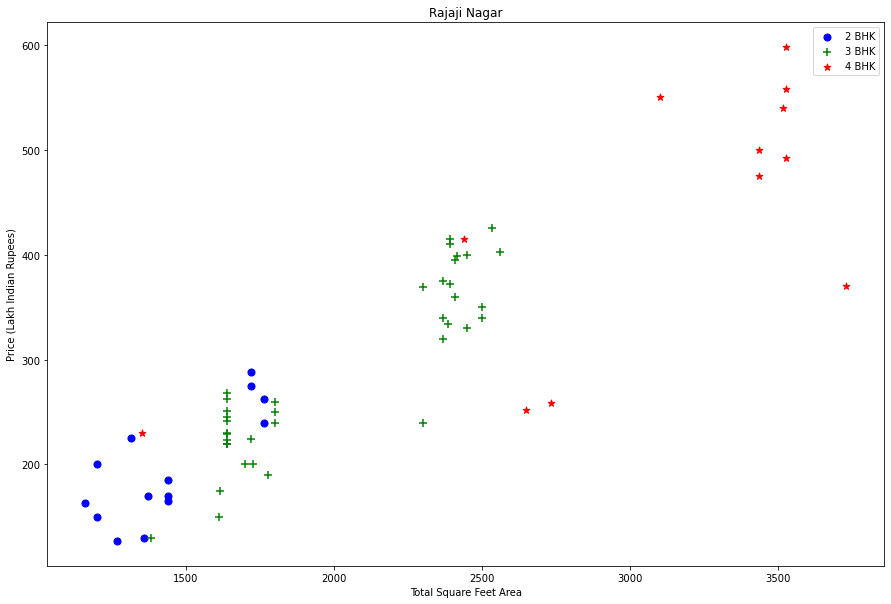

In [187]:
plot_scatter_chart(df8,"Rajaji Nagar")

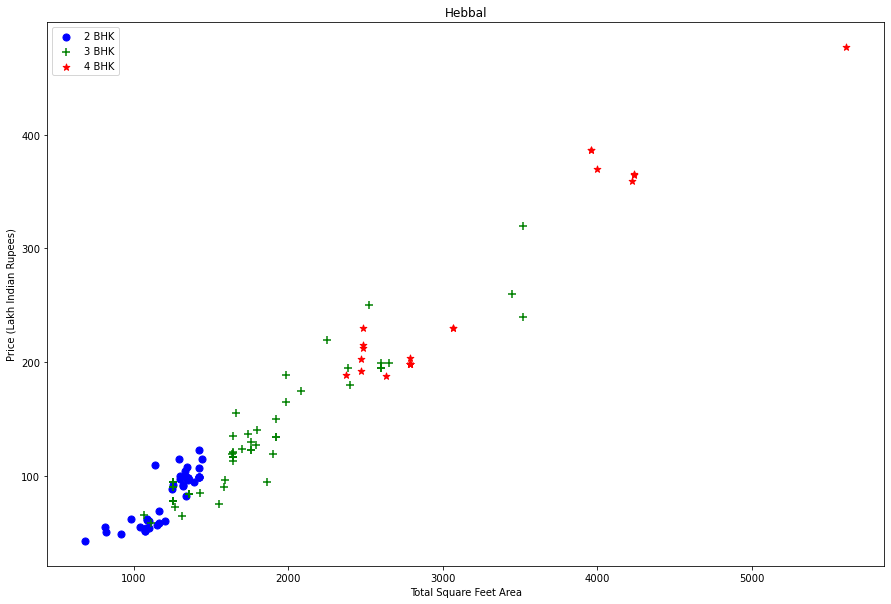

In [188]:
plot_scatter_chart(df8,"Hebbal")

#### Now we can remove those i th BHK apartments whose price_per_sqft is less than mean price_per_sqft of i-1 th BHK apartment

In [189]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
print( '\nShape before removing outlier : ', df8.shape)
df9 = remove_bhk_outliers(df8)
print( '\nShape after removing outlier : ' , df9.shape)


Shape before removing outlier :  (10242, 6)

Shape after removing outlier :  (7317, 6)


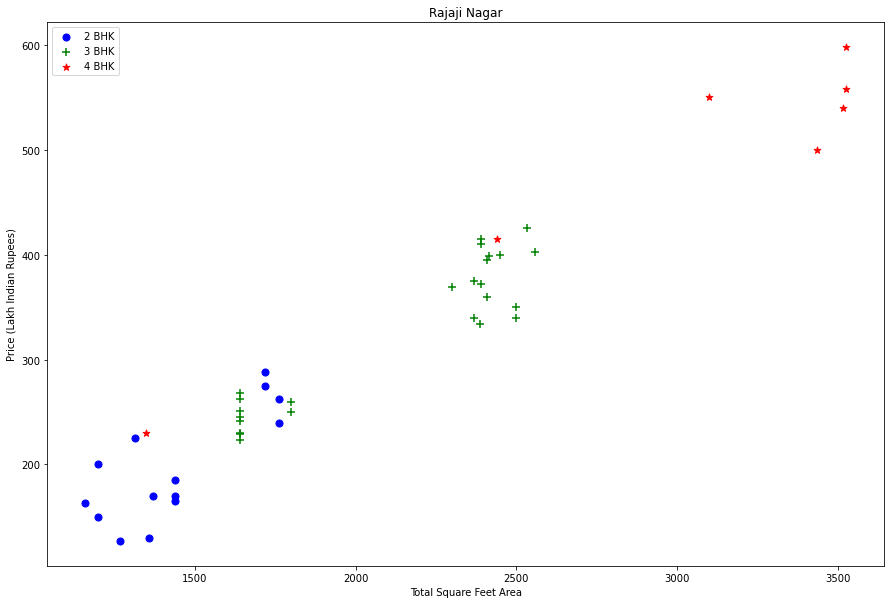

In [190]:
plot_scatter_chart(df9,"Rajaji Nagar")

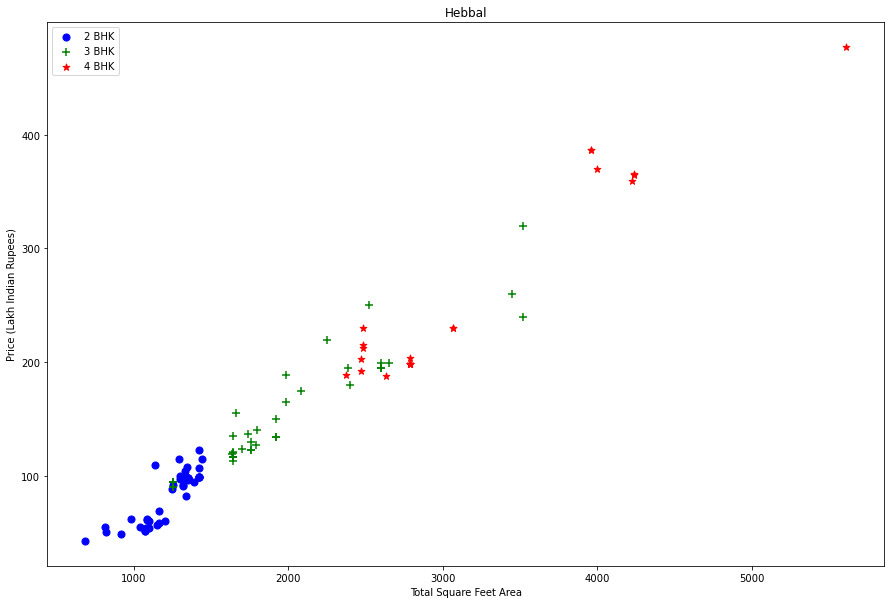

In [191]:
plot_scatter_chart(df9,"Hebbal")

Text(0, 0.5, 'Count')

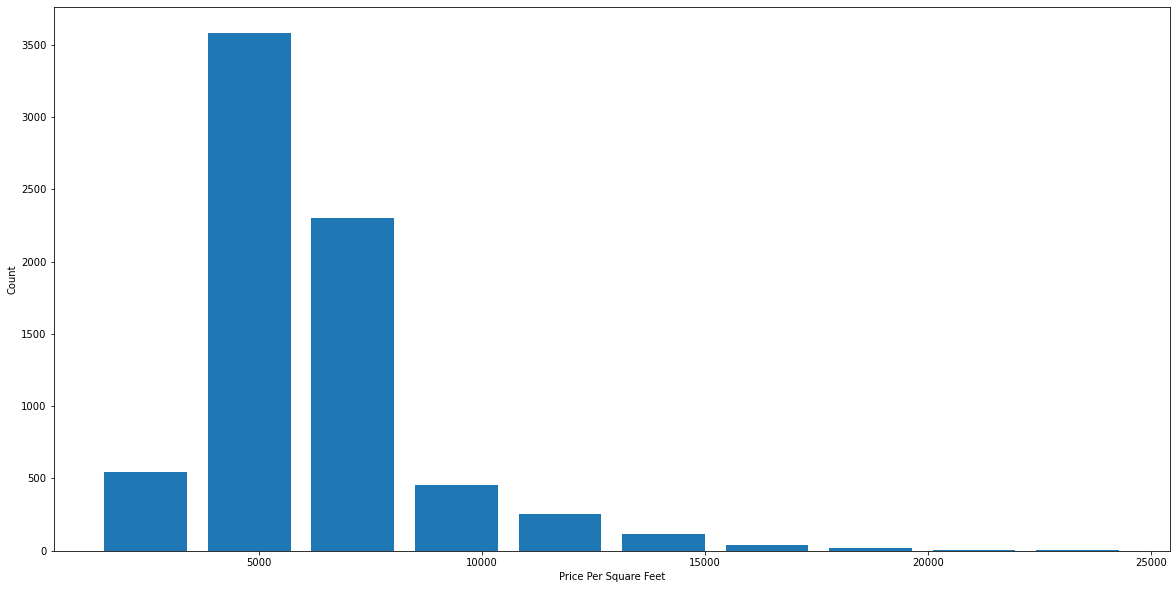

In [194]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df9.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

#### Outlier Removal Using Bathrooms Feature

In [206]:
print('Unique values of bath : ', df9['bath'].unique())
no_of_outlier = df9[df9['bath'] >= df9['bhk']+2 ].count()[0]
print('No of Outliers are : ', no_of_outlier)

Unique values of bath :  [ 4.  3.  2.  5.  8.  1.  6.  7.  9. 12. 16. 13.]
No of Outliers are :  78


In [207]:
'''
    It is unusual to have 2 more bathrooms than number of bedrooms in a home
    if you have bathroom in all 4 rooms plus one guest bathroom, you will have total bath = total bed + 1 max. 
    Anything above that is an outlier or a data error and can be removed
'''
print( '\nShape before removing outlier : ', df9.shape)
df10 = df9[ df9['bath'] < df9['bhk']+2 ]
print( '\nShape after removing outlier : ' , df10.shape)


Shape before removing outlier :  (7317, 6)

Shape after removing outlier :  (7239, 6)


#### Droping all unwanted columns here after

In [211]:
df11 = df10.drop(['price_per_sqft'],axis='columns')
df11

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2
...,...,...,...,...,...
10233,other,1200.0,2.0,70.0,2
10234,other,1800.0,1.0,200.0,1
10237,other,1353.0,2.0,110.0,2
10238,other,812.0,1.0,26.0,1


In [212]:
df11.to_csv("CleanHomePrice.csv",index=False)